In [115]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.optimize
import scipy.stats

In [116]:
x, y = np.genfromtxt('sada_422944_50ks.txt', unpack=True) #moje data

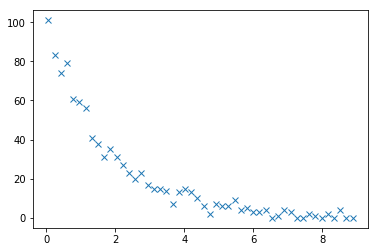

In [117]:
plt.plot(x, y, 'x')

In [118]:
mat_M=np.array([np.ones(len(x)), np.exp(-x)]).T #modelova matice - jak by to melo vypadat
mat_M

array([[  1.00000000e+00,   9.41764534e-01],
       [  1.00000000e+00,   7.86627861e-01],
       [  1.00000000e+00,   6.57046820e-01],
       [  1.00000000e+00,   5.48811636e-01],
       [  1.00000000e+00,   4.58406011e-01],
       [  1.00000000e+00,   3.82892886e-01],
       [  1.00000000e+00,   3.19819022e-01],
       [  1.00000000e+00,   2.67135302e-01],
       [  1.00000000e+00,   2.23130160e-01],
       [  1.00000000e+00,   1.86373976e-01],
       [  1.00000000e+00,   1.55672630e-01],
       [  1.00000000e+00,   1.30028711e-01],
       [  1.00000000e+00,   1.08609109e-01],
       [  1.00000000e+00,   9.07179533e-02],
       [  1.00000000e+00,   7.57740040e-02],
       [  1.00000000e+00,   6.32917684e-02],
       [  1.00000000e+00,   5.28657287e-02],
       [  1.00000000e+00,   4.41571684e-02],
       [  1.00000000e+00,   3.68831674e-02],
       [  1.00000000e+00,   3.08074110e-02],
       [  1.00000000e+00,   2.57325127e-02],
       [  1.00000000e+00,   2.14936013e-02],
       [  

In [119]:
hessian=mat_M.T.dot(mat_M)

In [120]:
hessian

array([[ 50.        ,   5.71632076],
       [  5.71632076,   2.93367837]])

In [121]:
covar=np.linalg.inv(hessian) #kovariancni matice
covar

array([[ 0.02573231, -0.05013982],
       [-0.05013982,  0.43856727]])

In [122]:
pars1=covar.dot(mat_M.T.dot(y))
pars1

array([   6.61518731,  112.35209871])

In [123]:
ymodel=mat_M.dot(pars1) #modelova matice - teoreticky prubeh mereni
sigma=6

In [124]:
def f(x, A, l):
    return A*np.exp(-x*l) #mereni casove zavislosti signalu detektoru castic y=A exp(-tl)

In [125]:
popt, pcov = scipy.optimize.curve_fit(f, x, y)

In [126]:
popt

array([ 100.29069189,    0.58725421])

In [127]:
pcov

array([[  3.55329239e+00,   2.08663077e-02],
       [  2.08663077e-02,   2.52386649e-04]])

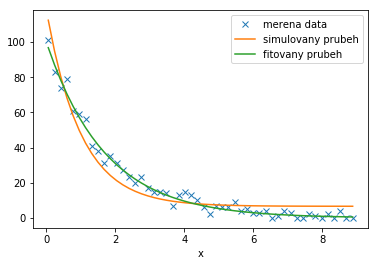

In [128]:
plt.plot(x, y, 'x', label='merena data')
plt.plot(x, ymodel, label="simulovany prubeh")
plt.plot(x, popt[0]*np.exp(-x*popt[1]), label='fitovany prubeh')
plt.xlabel('x')
plt.legend(loc=0)

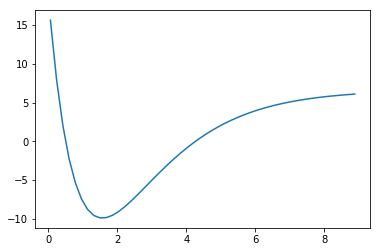

In [129]:
plt.plot(x, ymodel-popt[0]*np.exp(-x*popt[1])) #odchylka praveho prubehu od simulace

In [130]:
#suma rezidui
s0=sum((popt[0]*np.exp(-x*popt[1])-ymodel)**2)
rs0=s0/(len(x)-2) #2 urcovane parametry
print("reduk. chi^2: %.2f vs. skutecna sigma^2: %.2f"%(rs0,sigma**2))

reduk. chi^2: 36.63 vs. skutecna sigma^2: 36.00


In [131]:
errs=np.sqrt(covar.diagonal())
corel=covar/errs.reshape(1,2)/errs.reshape(2,1)
print("korelacni matice parametru")
corel

korelacni matice parametru


array([[ 1.        , -0.47198189],
       [-0.47198189,  1.        ]])

In [132]:
errs*=np.sqrt(rs0)
print("nejistoty parametru:"+str(errs))

nejistoty parametru:[ 0.97084193  4.00799597]


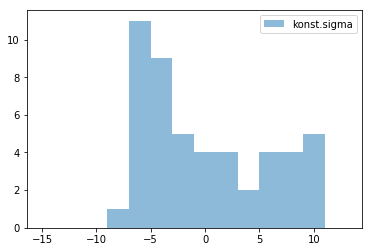

In [133]:
xbins=np.r_[-15:15:2]
ok1=plt.hist(popt[0]*np.exp(-x*popt[1])-ymodel,xbins,alpha=0.5,label="konst.sigma")
plt.legend(loc=0)

In [134]:
def moments(meas):
    cmeas = meas-meas.mean()
    return (cmeas**2).mean(), (cmeas**3).mean(),(cmeas**4).mean()
moms1 = moments(popt[0]*np.exp(-x*popt[1])-ymodel)
skew1,curt1 = moms1[1]/moms1[0]**1.5,moms1[2]/moms1[0]**2-3
skew1,curt1

(0.1808930034358612, -0.64787716062424394)

In [137]:
scipy.stats.kurtosis(popt[0]*np.exp(-x*popt[1])) #?! jine vysledky!!!

1.5872277812700748

In [138]:
scipy.stats.skew(popt[0]*np.exp(-x*popt[1])) #?! jine vysledky!!!

1.59206267752663